In [22]:
!pip install tokenizers datasets seqeval sklearn-crfsuite nltk scikit-learn==0.23.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 72.0 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.5 requires scikit-learn>=1.0.0, but you have scikit-learn 0.23.2 which is incompatible.
imbalanced-learn 0.8.1 requires scikit-learn>=0.24, but you have scikit-learn 0.23.2 which is incompatible.


In [ ]:
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|
    
    To login, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Token: 
Add token as git credential? (Y/n) n
Token is valid.
Your token has been saved to /root/.cache/huggingface/token
Login successful


In [1]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [2]:
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"

In [3]:
from datasets import load_dataset

dataset_de = load_dataset('wikiann', 'de', keep_in_memory=True)
dataset_en = load_dataset('wikiann', 'en', keep_in_memory=True)
dataset_fr = load_dataset('wikiann', 'fr', keep_in_memory=True)
dataset_es = load_dataset('wikiann', 'es', keep_in_memory=True)

dataset_conll = load_dataset('conll2003', keep_in_memory=True)

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

In [4]:
dataset_de = dataset_de.map(lambda example: {"pos_tags": [x[1] for x in nltk.pos_tag(example["tokens"])]})
dataset_en = dataset_en.map(lambda example: {"pos_tags": [x[1] for x in nltk.pos_tag(example["tokens"])]})
dataset_fr = dataset_fr.map(lambda example: {"pos_tags": [x[1] for x in nltk.pos_tag(example["tokens"])]})
dataset_es = dataset_es.map(lambda example: {"pos_tags": [x[1] for x in nltk.pos_tag(example["tokens"])]})

  0%|          | 0/10000 [00:00<?, ?ex/s]

  0%|          | 0/10000 [00:00<?, ?ex/s]

  0%|          | 0/20000 [00:00<?, ?ex/s]

  0%|          | 0/10000 [00:00<?, ?ex/s]

  0%|          | 0/10000 [00:00<?, ?ex/s]

  0%|          | 0/20000 [00:00<?, ?ex/s]

  0%|          | 0/10000 [00:00<?, ?ex/s]

  0%|          | 0/10000 [00:00<?, ?ex/s]

  0%|          | 0/20000 [00:00<?, ?ex/s]

  0%|          | 0/10000 [00:00<?, ?ex/s]

  0%|          | 0/10000 [00:00<?, ?ex/s]

  0%|          | 0/20000 [00:00<?, ?ex/s]

In [5]:
id2label_conll = {k:v for k,v in enumerate(dataset_conll['train'].features['ner_tags'].feature.names)}
label2id_conll = {v:k for k,v in enumerate(dataset_conll['train'].features['ner_tags'].feature.names)}

In [25]:
from datasets import ClassLabel
import datasets

dataset_conll = dataset_conll.remove_columns(["pos_tags"])
dataset_conll = dataset_conll.map(lambda example: {"ner_tags": [0 if id2label_conll[x]=="B-MISC" or id2label_conll[x]=="I-MISC" else x for x in example["ner_tags"]]})#, features=features)
dataset_conll = dataset_conll.cast_column("ner_tags", datasets.Sequence(datasets.ClassLabel(names=['O', 'B-PER', 'I-PER', 'B-ORG', 'I-ORG', 'B-LOC', 'I-LOC'])))
dataset_conll = dataset_conll.map(lambda example: {"pos_tags": [x[1] for x in nltk.pos_tag(example["tokens"])]})

  0%|          | 0/14041 [00:00<?, ?ex/s]

  0%|          | 0/3250 [00:00<?, ?ex/s]

  0%|          | 0/3453 [00:00<?, ?ex/s]

Casting the dataset:   0%|          | 0/15 [00:00<?, ?ba/s]

Casting the dataset:   0%|          | 0/4 [00:00<?, ?ba/s]

Casting the dataset:   0%|          | 0/4 [00:00<?, ?ba/s]

  0%|          | 0/14041 [00:00<?, ?ex/s]

  0%|          | 0/3250 [00:00<?, ?ex/s]

  0%|          | 0/3453 [00:00<?, ?ex/s]

In [26]:
dataset_conll["train"].features

{'id': Value(dtype='string', id=None),
 'tokens': Sequence(feature=Value(dtype='string', id=None), length=-1, id=None),
 'chunk_tags': Sequence(feature=ClassLabel(names=['O', 'B-ADJP', 'I-ADJP', 'B-ADVP', 'I-ADVP', 'B-CONJP', 'I-CONJP', 'B-INTJ', 'I-INTJ', 'B-LST', 'I-LST', 'B-NP', 'I-NP', 'B-PP', 'I-PP', 'B-PRT', 'I-PRT', 'B-SBAR', 'I-SBAR', 'B-UCP', 'I-UCP', 'B-VP', 'I-VP'], id=None), length=-1, id=None),
 'ner_tags': Sequence(feature=ClassLabel(names=['O', 'B-PER', 'I-PER', 'B-ORG', 'I-ORG', 'B-LOC', 'I-LOC'], id=None), length=-1, id=None),
 'pos_tags': Sequence(feature=Value(dtype='string', id=None), length=-1, id=None)}

In [31]:
dataset_conll["test"][5]

{'id': '5',
 'tokens': ['China',
  'controlled',
  'most',
  'of',
  'the',
  'match',
  'and',
  'saw',
  'several',
  'chances',
  'missed',
  'until',
  'the',
  '78th',
  'minute',
  'when',
  'Uzbek',
  'striker',
  'Igor',
  'Shkvyrin',
  'took',
  'advantage',
  'of',
  'a',
  'misdirected',
  'defensive',
  'header',
  'to',
  'lob',
  'the',
  'ball',
  'over',
  'the',
  'advancing',
  'Chinese',
  'keeper',
  'and',
  'into',
  'an',
  'empty',
  'net',
  '.'],
 'chunk_tags': [11,
  21,
  11,
  13,
  11,
  12,
  0,
  21,
  11,
  12,
  21,
  17,
  11,
  12,
  12,
  3,
  11,
  12,
  11,
  12,
  21,
  11,
  13,
  11,
  12,
  12,
  12,
  21,
  22,
  11,
  12,
  13,
  11,
  12,
  12,
  12,
  0,
  13,
  11,
  12,
  12,
  0],
 'ner_tags': [5,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  2,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 'pos_tags': ['NNP',
  'VBD',
  'JJS'

In [9]:
from datasets import concatenate_datasets, interleave_datasets
dataset_all_train = interleave_datasets([dataset_de["train"], dataset_en["train"], dataset_fr["train"], dataset_es["train"]])
dataset_all_test = interleave_datasets([dataset_de["test"], dataset_en["test"], dataset_fr["test"], dataset_es["test"]])

In [6]:
dataset_de["train"].features

{'tokens': Sequence(feature=Value(dtype='string', id=None), length=-1, id=None),
 'ner_tags': Sequence(feature=ClassLabel(names=['O', 'B-PER', 'I-PER', 'B-ORG', 'I-ORG', 'B-LOC', 'I-LOC'], id=None), length=-1, id=None),
 'langs': Sequence(feature=Value(dtype='string', id=None), length=-1, id=None),
 'spans': Sequence(feature=Value(dtype='string', id=None), length=-1, id=None),
 'pos': Sequence(feature=Value(dtype='string', id=None), length=-1, id=None)}

In [7]:
dataset_de["train"].features

{'tokens': Sequence(feature=Value(dtype='string', id=None), length=-1, id=None),
 'ner_tags': Sequence(feature=ClassLabel(names=['O', 'B-PER', 'I-PER', 'B-ORG', 'I-ORG', 'B-LOC', 'I-LOC'], id=None), length=-1, id=None),
 'langs': Sequence(feature=Value(dtype='string', id=None), length=-1, id=None),
 'spans': Sequence(feature=Value(dtype='string', id=None), length=-1, id=None),
 'pos': Sequence(feature=Value(dtype='string', id=None), length=-1, id=None)}

In [10]:
id2label = {k:v for k,v in enumerate(dataset_de['train'].features['ner_tags'].feature.names)}
label2id = {v:k for k,v in enumerate(dataset_de['train'].features['ner_tags'].feature.names)}

In [9]:
dataset_all_train[3]

{'tokens': ['REDIRECCIÓN', 'Algarrobo', '(', 'Chile', ')'],
 'ner_tags': [0, 5, 6, 6, 6],
 'langs': ['es', 'es', 'es', 'es', 'es'],
 'spans': ['LOC: Algarrobo ( Chile )'],
 'pos': ['NNP', 'NNP', '(', 'NNP', ')']}

# CRF

In [11]:
def word2features(dataset, i):
    word = dataset["tokens"][i]
    l = dataset["ner_tags"][i]
    pos = dataset["pos_tags"][i]


    features = {
        'bias': 1.0,
        'word.lower()': word.lower(),
        'word[-3:]': word[-3:],
        'word[-2:]': word[-2:],
        'word.isupper()': word.isupper(),
        'word.istitle()': word.istitle(),
        'word.isdigit()': word.isdigit(),
        'postag': pos,
        #'postag[:2]': pos[:2],
    }
    if i > 0:
        word1 = dataset["tokens"][i-1]
        l1 = dataset["ner_tags"][i-1]
        pos1 = dataset["pos_tags"][i-1]
        features.update({
            '-1:word.lower()': word1.lower(),
            '-1:word.istitle()': word1.istitle(),
            '-1:word.isupper()': word1.isupper(),
            '-1:postag': pos1,
            #'-1:postag[:2]': pos1[:2],
        })
    else:
        features['BOS'] = True

    if i < len(dataset["tokens"])-1:
        word1 = dataset["tokens"][i+1]
        l1 = dataset["ner_tags"][i+1]
        pos1 = dataset["pos_tags"][i+1]
        features.update({
            '+1:word.lower()': word1.lower(),
            '+1:word.istitle()': word1.istitle(),
            '+1:word.isupper()': word1.isupper(),
            '+1:postag': pos1,
            #'+1:postag[:2]': pos1[:2],
        })
    else:
        features['EOS'] = True

    return features


def sent2features(sent):
    return [word2features(sent, i) for i in range(len(sent["tokens"]))]

def sent2labels(sent):
    return [id2label[label] for label in sent["ner_tags"]]

def sent2tokens(sent):
    return [token for token in sent["tokens"]]

def sent2labels(sent):
    return [id2label[label] for label in sent["ner_tags"]]

#y_train = [sent2labels(s) for s in dataset['train']]

In [12]:
d_train = dataset_all_train
d_test = dataset_all_test

X_train = [sent2features(s) for s in d_train]
y_train = [sent2labels(s) for s in d_train]

X_test = [sent2features(s) for s in d_test]
y_test = [sent2labels(s) for s in d_test]

In [32]:
X_test_de = [sent2features(s) for s in dataset_de["test"]]
y_test_de = [sent2labels(s) for s in dataset_de["test"]]

X_test_en = [sent2features(s) for s in dataset_en["test"]]
y_test_en = [sent2labels(s) for s in dataset_en["test"]]

X_test_fr = [sent2features(s) for s in dataset_fr["test"]]
y_test_fr = [sent2labels(s) for s in dataset_fr["test"]]

X_test_es = [sent2features(s) for s in dataset_es["test"]]
y_test_es = [sent2labels(s) for s in dataset_es["test"]]

X_test_es = [sent2features(s) for s in dataset_es["test"]]
y_test_es = [sent2labels(s) for s in dataset_es["test"]]

X_test_conll = [sent2features(s) for s in dataset_conll["test"]]
y_test_conll = [sent2labels(s) for s in dataset_conll["test"]]

In [13]:
X_train[0]

[{'bias': 1.0,
  'word.lower()': 'als',
  'word[-3:]': 'als',
  'word[-2:]': 'ls',
  'word.isupper()': False,
  'word.istitle()': False,
  'word.isdigit()': False,
  'postag': 'NNS',
  'BOS': True,
  '+1:word.lower()': 'teil',
  '+1:word.istitle()': True,
  '+1:word.isupper()': False,
  '+1:postag': 'NNP'},
 {'bias': 1.0,
  'word.lower()': 'teil',
  'word[-3:]': 'eil',
  'word[-2:]': 'il',
  'word.isupper()': False,
  'word.istitle()': True,
  'word.isdigit()': False,
  'postag': 'NNP',
  '-1:word.lower()': 'als',
  '-1:word.istitle()': False,
  '-1:word.isupper()': False,
  '-1:postag': 'NNS',
  '+1:word.lower()': 'der',
  '+1:word.istitle()': False,
  '+1:word.isupper()': False,
  '+1:postag': 'NN'},
 {'bias': 1.0,
  'word.lower()': 'der',
  'word[-3:]': 'der',
  'word[-2:]': 'er',
  'word.isupper()': False,
  'word.istitle()': False,
  'word.isdigit()': False,
  'postag': 'NN',
  '-1:word.lower()': 'teil',
  '-1:word.istitle()': True,
  '-1:word.isupper()': False,
  '-1:postag': 'NN

In [33]:
X_test_conll[0]

[{'bias': 1.0,
  'word.lower()': 'soccer',
  'word[-3:]': 'CER',
  'word[-2:]': 'ER',
  'word.isupper()': True,
  'word.istitle()': False,
  'word.isdigit()': False,
  'postag': 'NNP',
  'BOS': True,
  '+1:word.lower()': '-',
  '+1:word.istitle()': False,
  '+1:word.isupper()': False,
  '+1:postag': ':'},
 {'bias': 1.0,
  'word.lower()': '-',
  'word[-3:]': '-',
  'word[-2:]': '-',
  'word.isupper()': False,
  'word.istitle()': False,
  'word.isdigit()': False,
  'postag': ':',
  '-1:word.lower()': 'soccer',
  '-1:word.istitle()': False,
  '-1:word.isupper()': True,
  '-1:postag': 'NNP',
  '+1:word.lower()': 'japan',
  '+1:word.istitle()': False,
  '+1:word.isupper()': True,
  '+1:postag': 'NNP'},
 {'bias': 1.0,
  'word.lower()': 'japan',
  'word[-3:]': 'PAN',
  'word[-2:]': 'AN',
  'word.isupper()': True,
  'word.istitle()': False,
  'word.isdigit()': False,
  'postag': 'NNP',
  '-1:word.lower()': '-',
  '-1:word.istitle()': False,
  '-1:word.isupper()': False,
  '-1:postag': ':',
  '

In [15]:
import sklearn_crfsuite

crf = sklearn_crfsuite.CRF(
    algorithm='lbfgs',
    c1=0.1,
    c2=0.1,
    max_iterations=100,
    all_possible_transitions=True
)
crf.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


CRF(algorithm='lbfgs', all_possible_transitions=True, c1=0.1, c2=0.1,
    keep_tempfiles=None, max_iterations=100)

# Evaluation

In [16]:
crf_labels = list(crf.classes_)

In [34]:
y_pred = crf.predict(X_test)
y_pred_de = crf.predict(X_test_de)
y_pred_en = crf.predict(X_test_en)
y_pred_fr = crf.predict(X_test_fr)
y_pred_es = crf.predict(X_test_es)
y_pred_conll = crf.predict(X_test_conll)

In [18]:
import seqeval
from seqeval.metrics import classification_report

In [27]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         LOC       0.77      0.78      0.78     19328
         ORG       0.74      0.67      0.70     16363
         PER       0.85      0.84      0.85     17764

   micro avg       0.79      0.77      0.78     53455
   macro avg       0.79      0.76      0.78     53455
weighted avg       0.79      0.77      0.78     53455



In [29]:
print(classification_report(y_test_de, y_pred_de))

              precision    recall  f1-score   support

         LOC       0.77      0.78      0.77      4961
         ORG       0.75      0.63      0.68      4157
         PER       0.85      0.82      0.84      4750

   micro avg       0.79      0.75      0.77     13868
   macro avg       0.79      0.74      0.77     13868
weighted avg       0.79      0.75      0.77     13868



In [31]:
print(classification_report(y_test_en, y_pred_en))

              precision    recall  f1-score   support

         LOC       0.67      0.71      0.69      4657
         ORG       0.66      0.57      0.61      4745
         PER       0.81      0.83      0.82      4556

   micro avg       0.71      0.70      0.71     13958
   macro avg       0.71      0.70      0.71     13958
weighted avg       0.71      0.70      0.70     13958



In [30]:
print(classification_report(y_test_fr, y_pred_fr))

              precision    recall  f1-score   support

         LOC       0.80      0.77      0.79      4985
         ORG       0.77      0.72      0.75      3885
         PER       0.88      0.86      0.87      4499

   micro avg       0.82      0.79      0.80     13369
   macro avg       0.82      0.78      0.80     13369
weighted avg       0.82      0.79      0.80     13369



In [19]:
print(classification_report(y_test_es, y_pred_es))

              precision    recall  f1-score   support

         LOC       0.85      0.87      0.86      4725
         ORG       0.81      0.77      0.79      3576
         PER       0.88      0.88      0.88      3959

   micro avg       0.85      0.84      0.84     12260
   macro avg       0.84      0.84      0.84     12260
weighted avg       0.85      0.84      0.84     12260



In [35]:
print(classification_report(y_test_conll, y_pred_conll))

              precision    recall  f1-score   support

         LOC       0.54      0.38      0.44      1668
         ORG       0.14      0.19      0.16      1661
         PER       0.67      0.45      0.54      1617

   micro avg       0.38      0.34      0.36      4946
   macro avg       0.45      0.34      0.38      4946
weighted avg       0.45      0.34      0.38      4946



In [36]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [37]:
base_filename = "fig_ner_crf_"

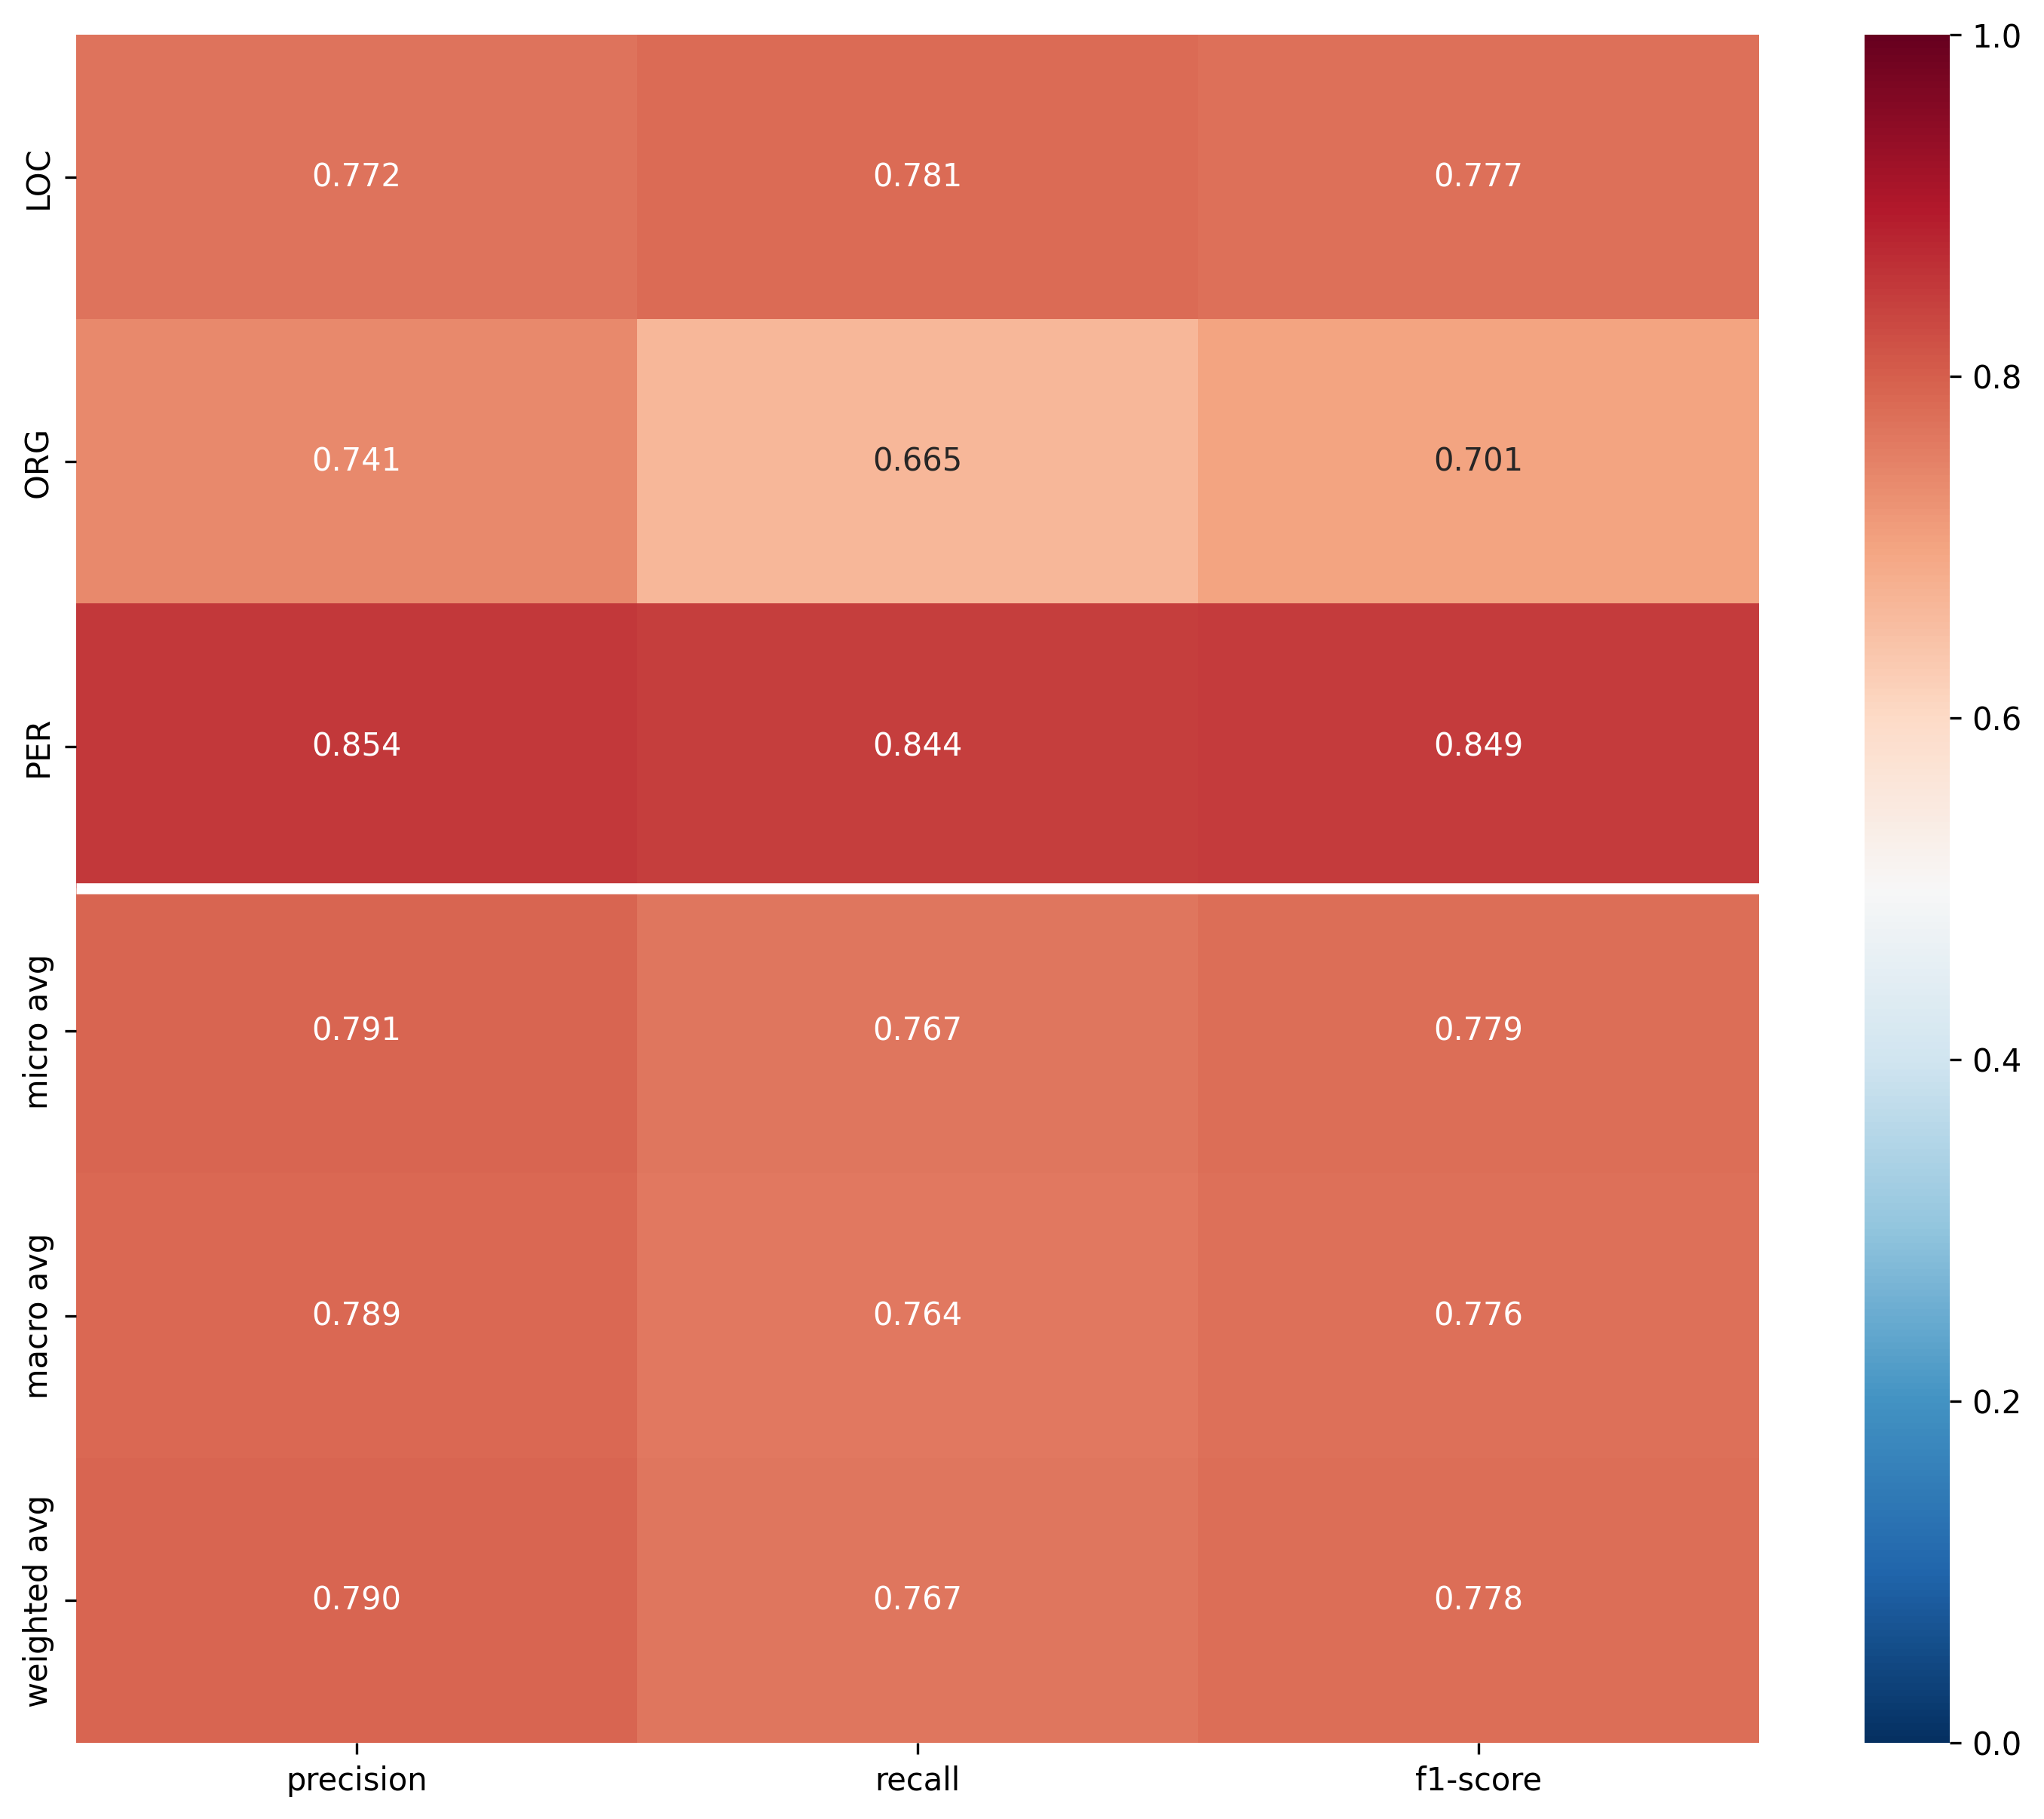

In [35]:
report = classification_report(y_test, y_pred, output_dict=True)
df_cr = pd.DataFrame(report)
fig, ax = plt.subplots(figsize=(12,10), dpi=300) 
sns.heatmap(df_cr.iloc[:-1, :].T, annot=True, fmt=".3f", cmap= 'RdBu_r', vmin=0, vmax=1, ax=ax )
ax.hlines([3], *ax.get_xlim(), colors="white", linewidths = 3.5)
fig.show()
fig.savefig(base_filename + "all_cls_report.png")

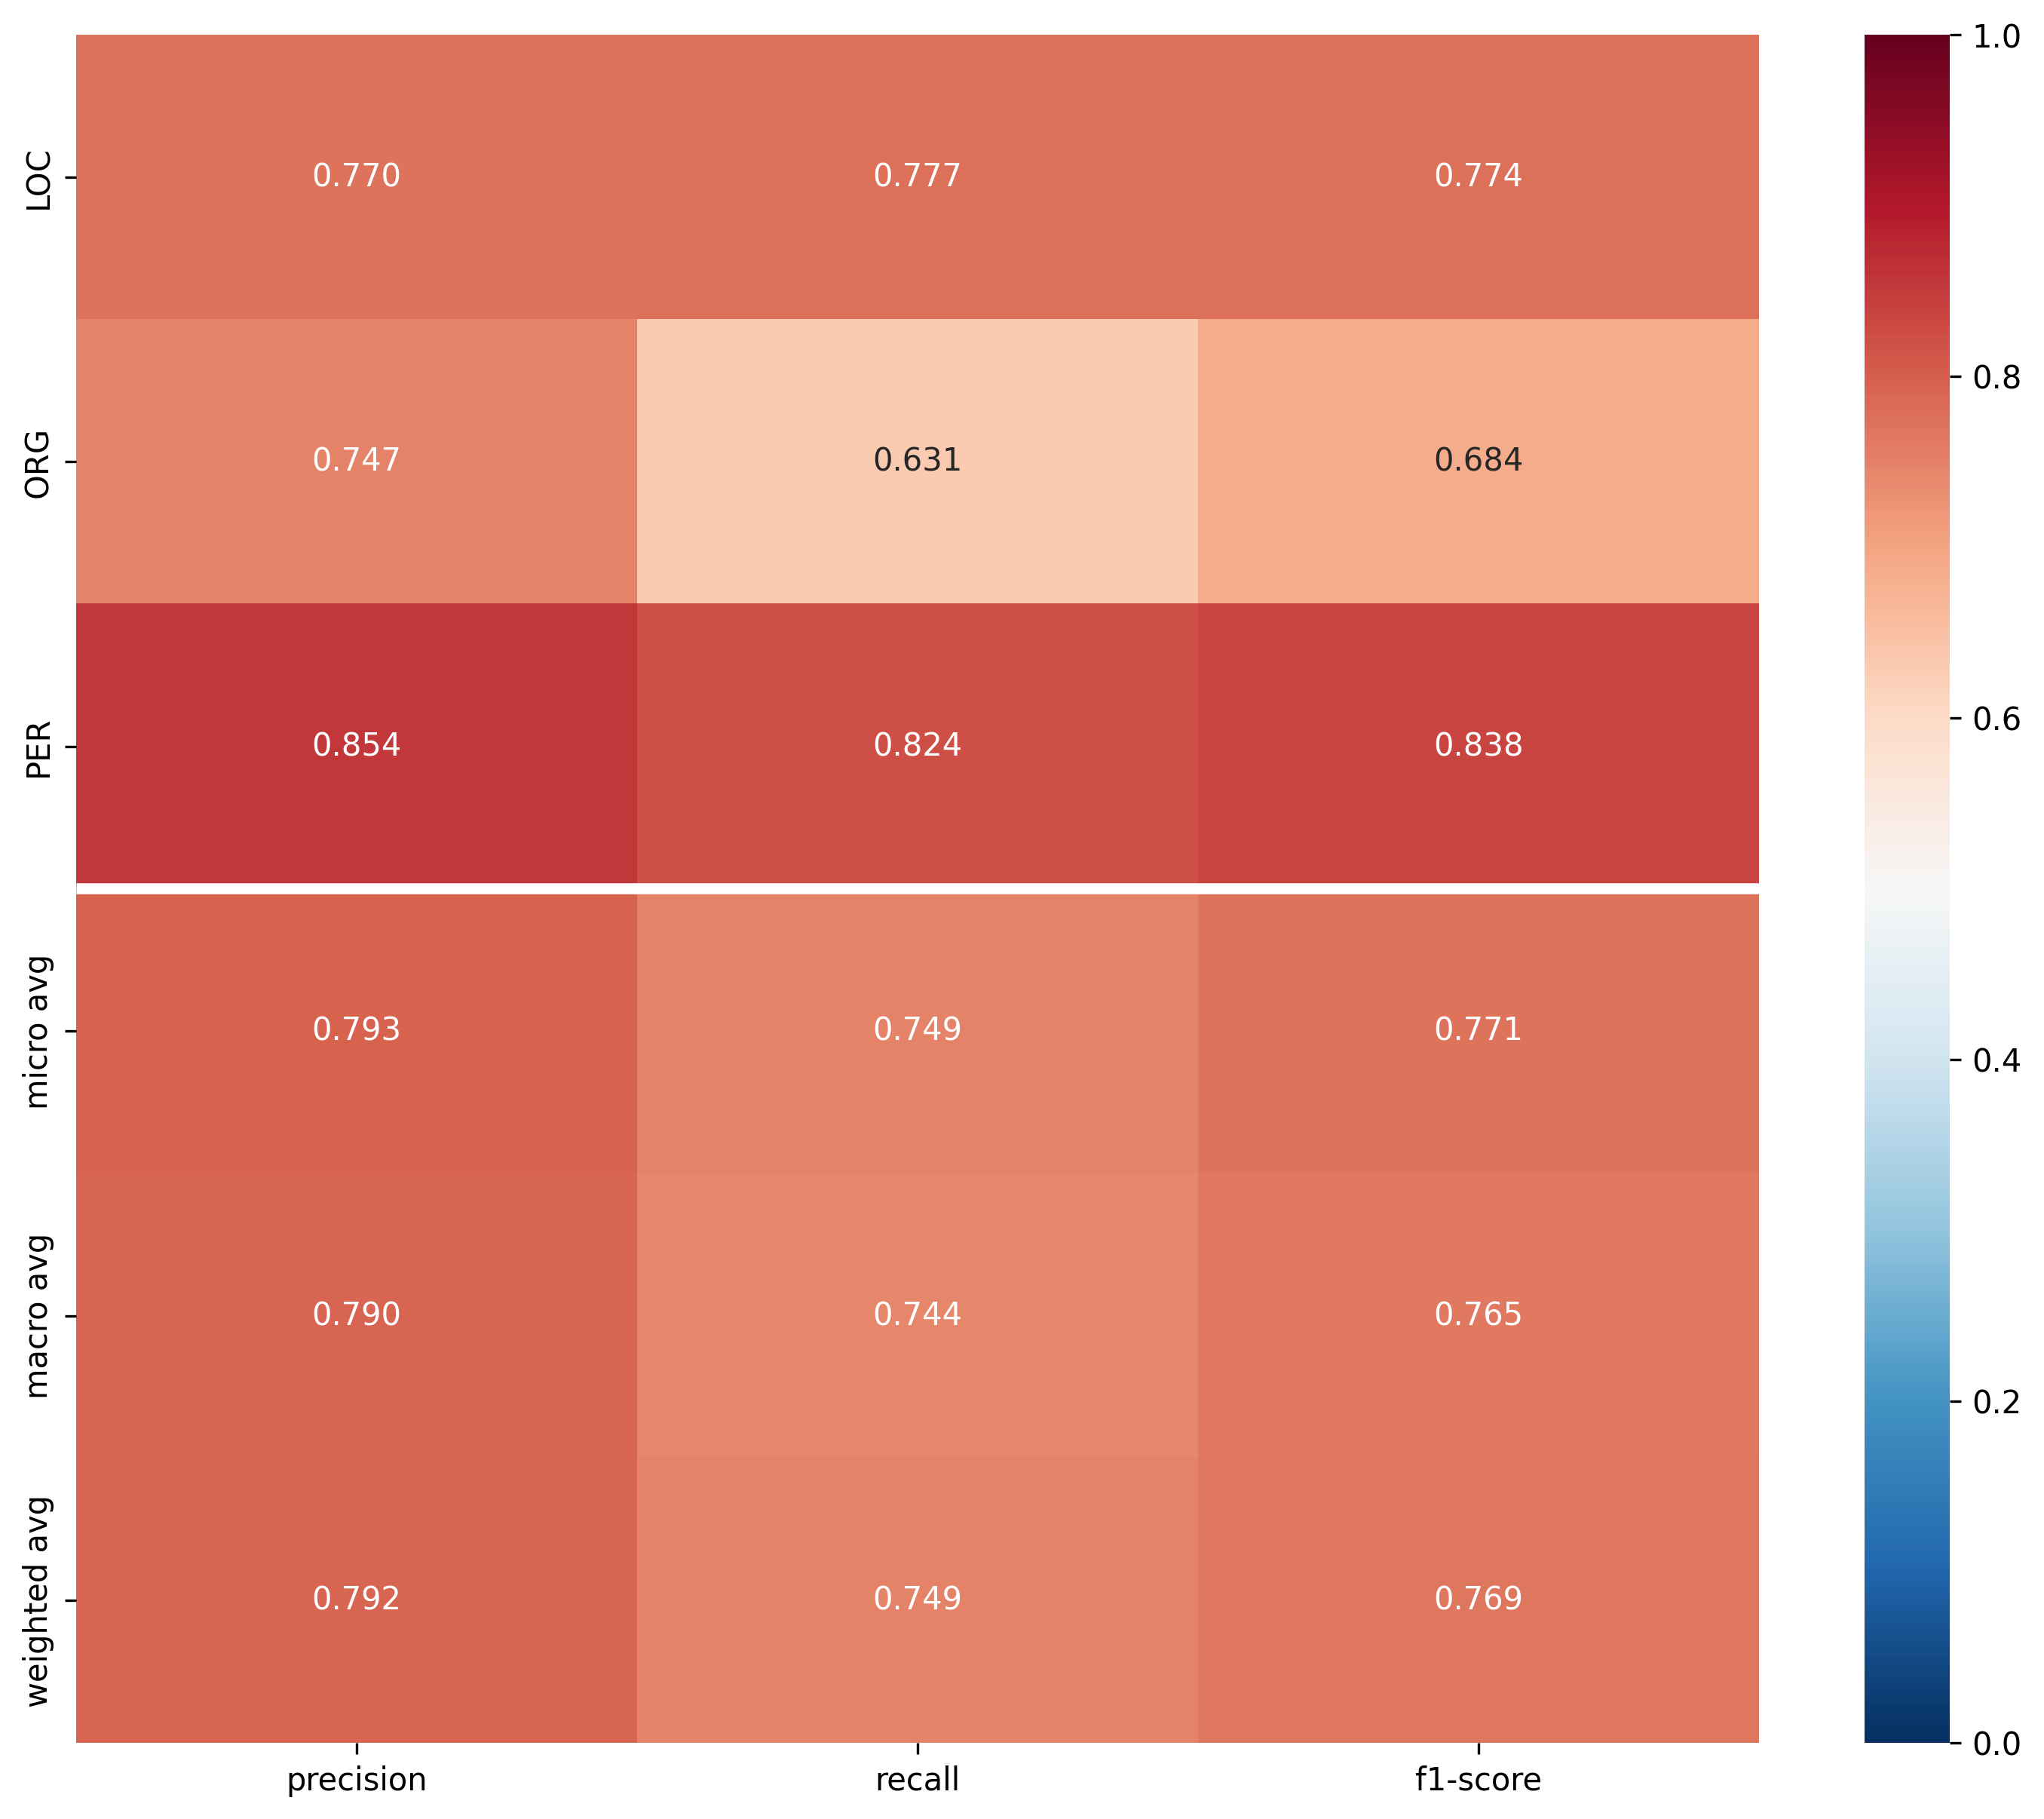

In [36]:
report = classification_report(y_test_de, y_pred_de, output_dict=True)
df_cr = pd.DataFrame(report)
fig, ax = plt.subplots(figsize=(12,10), dpi=300) 
sns.heatmap(df_cr.iloc[:-1, :].T, annot=True, fmt=".3f", cmap= 'RdBu_r', vmin=0, vmax=1, ax=ax )
ax.hlines([3], *ax.get_xlim(), colors="white", linewidths = 3.5)
fig.show()
fig.savefig(base_filename + "de_cls_report.png")

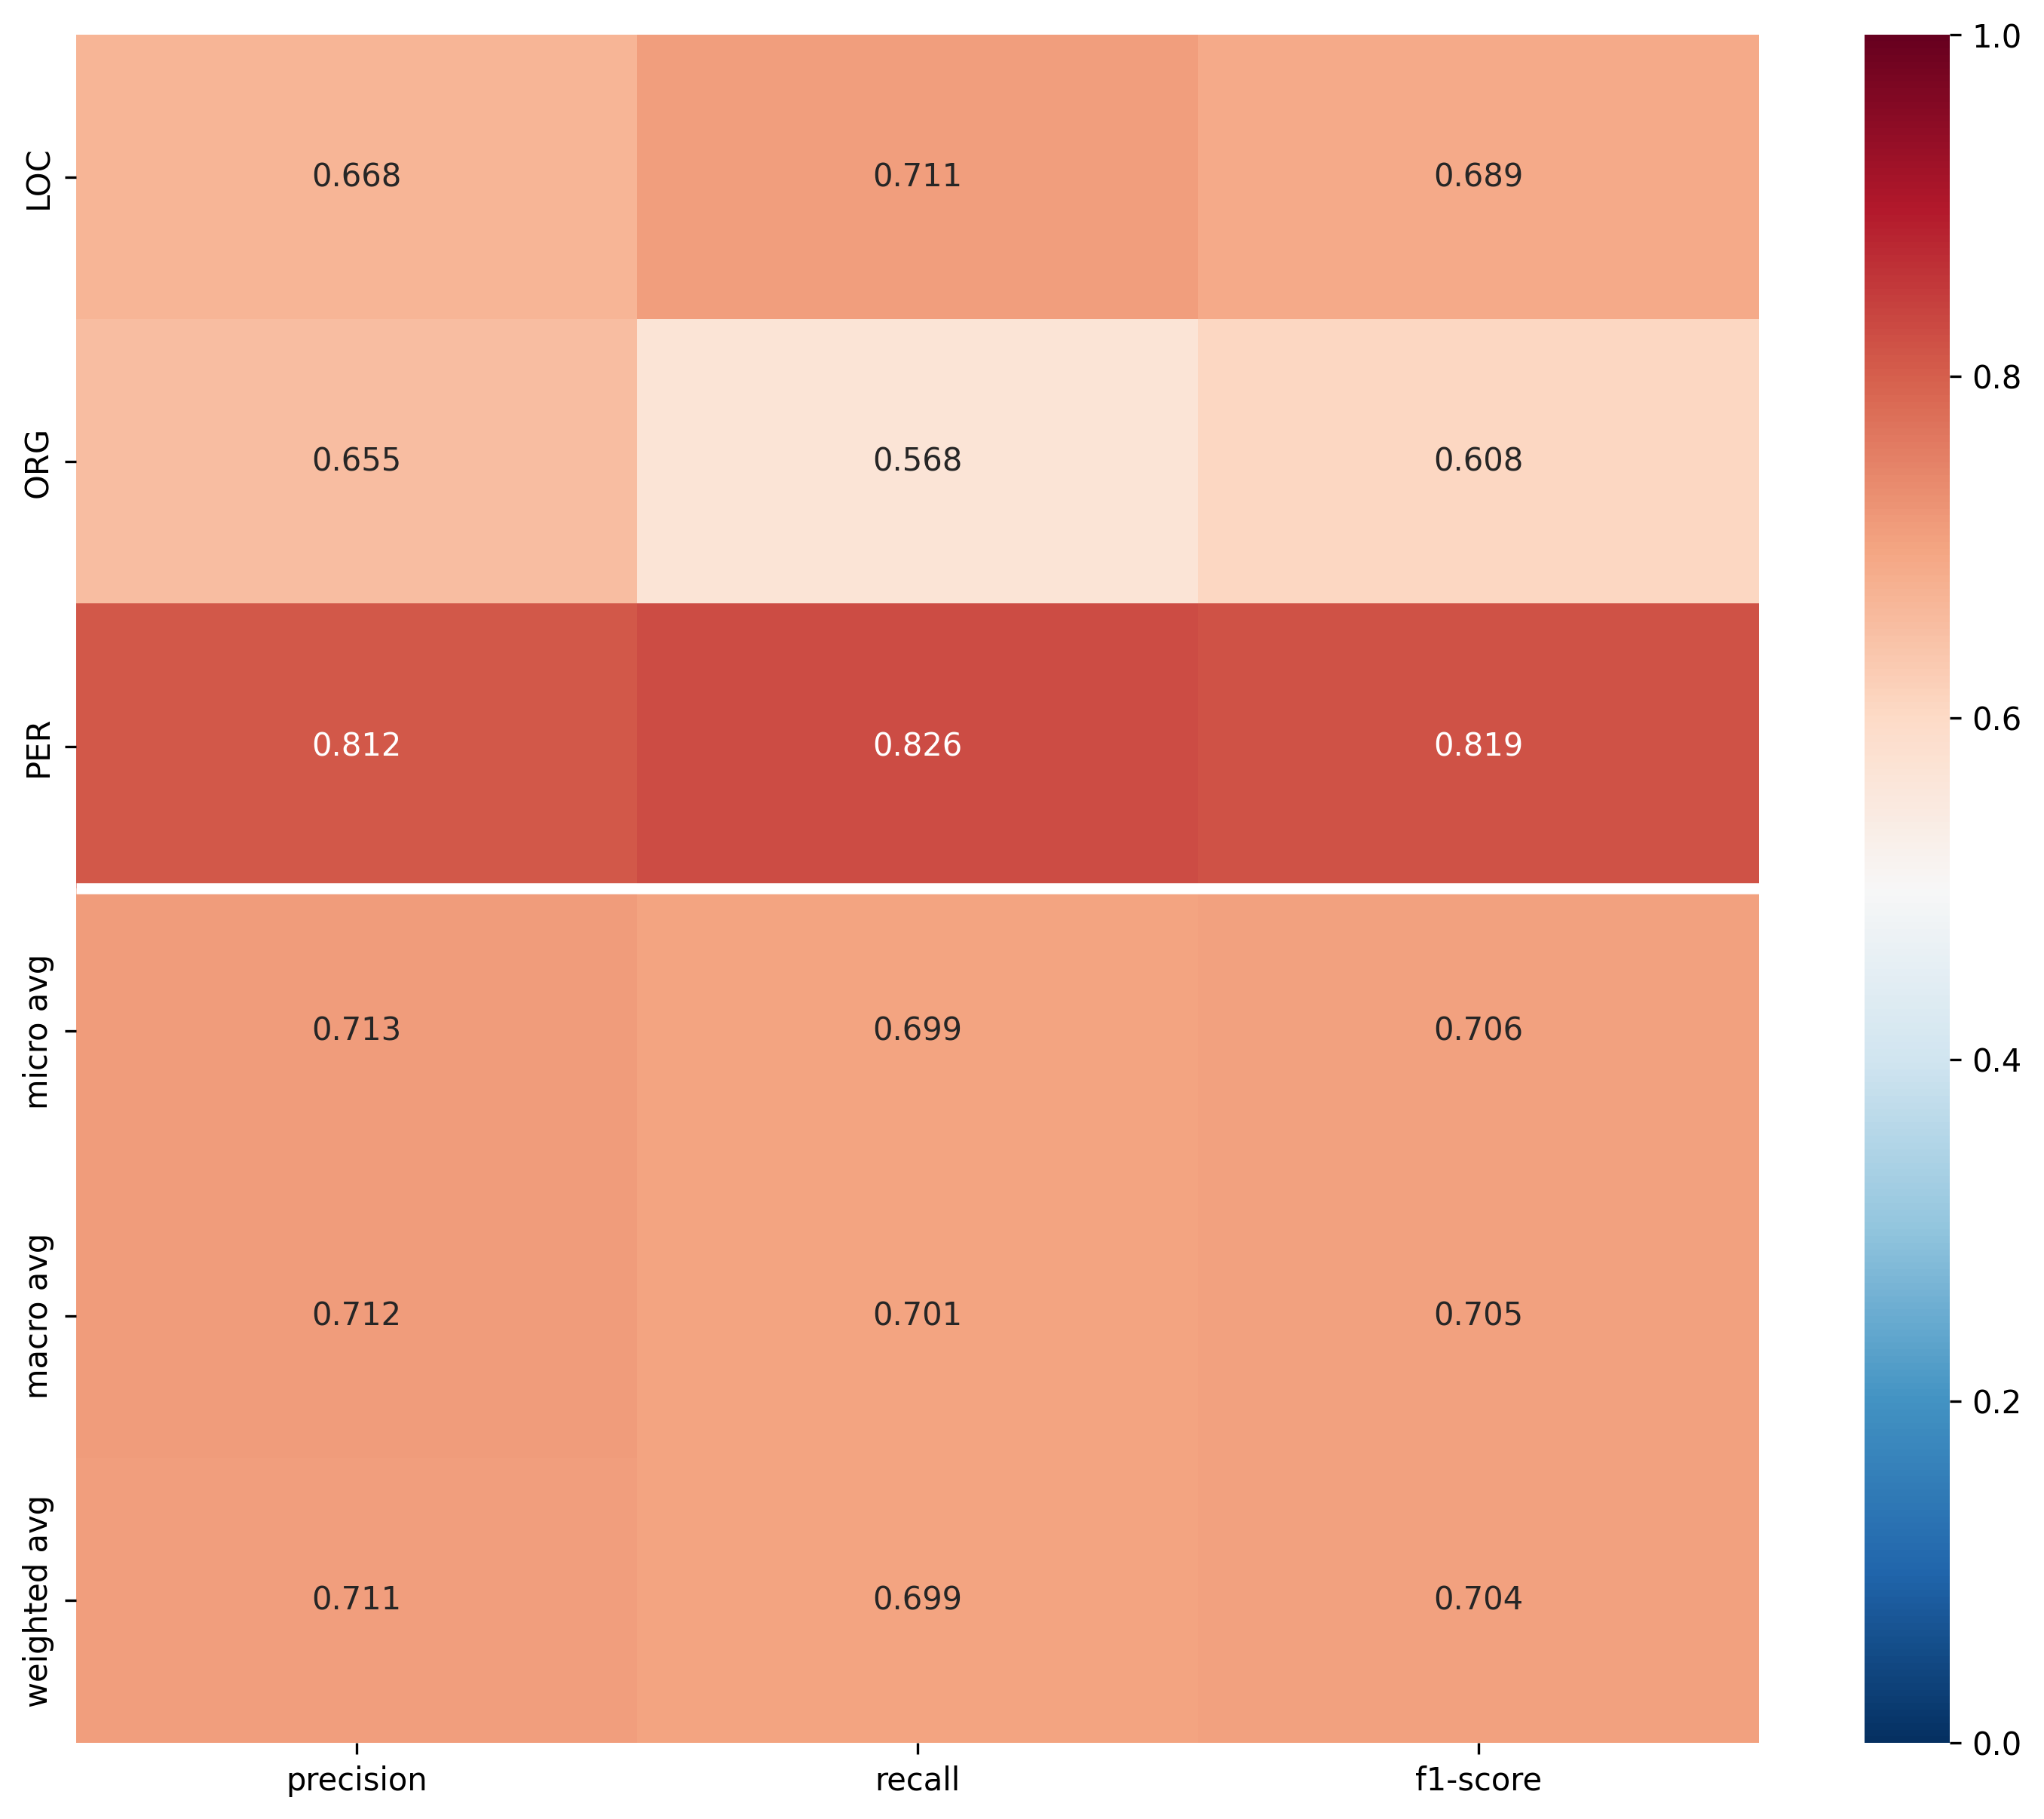

In [37]:
report = classification_report(y_test_en, y_pred_en, output_dict=True)
df_cr = pd.DataFrame(report)
fig, ax = plt.subplots(figsize=(12,10), dpi=300) 
sns.heatmap(df_cr.iloc[:-1, :].T, annot=True, fmt=".3f", cmap= 'RdBu_r', vmin=0, vmax=1, ax=ax )
ax.hlines([3], *ax.get_xlim(), colors="white", linewidths = 3.5)
fig.show()
fig.savefig(base_filename + "en_cls_report.png")

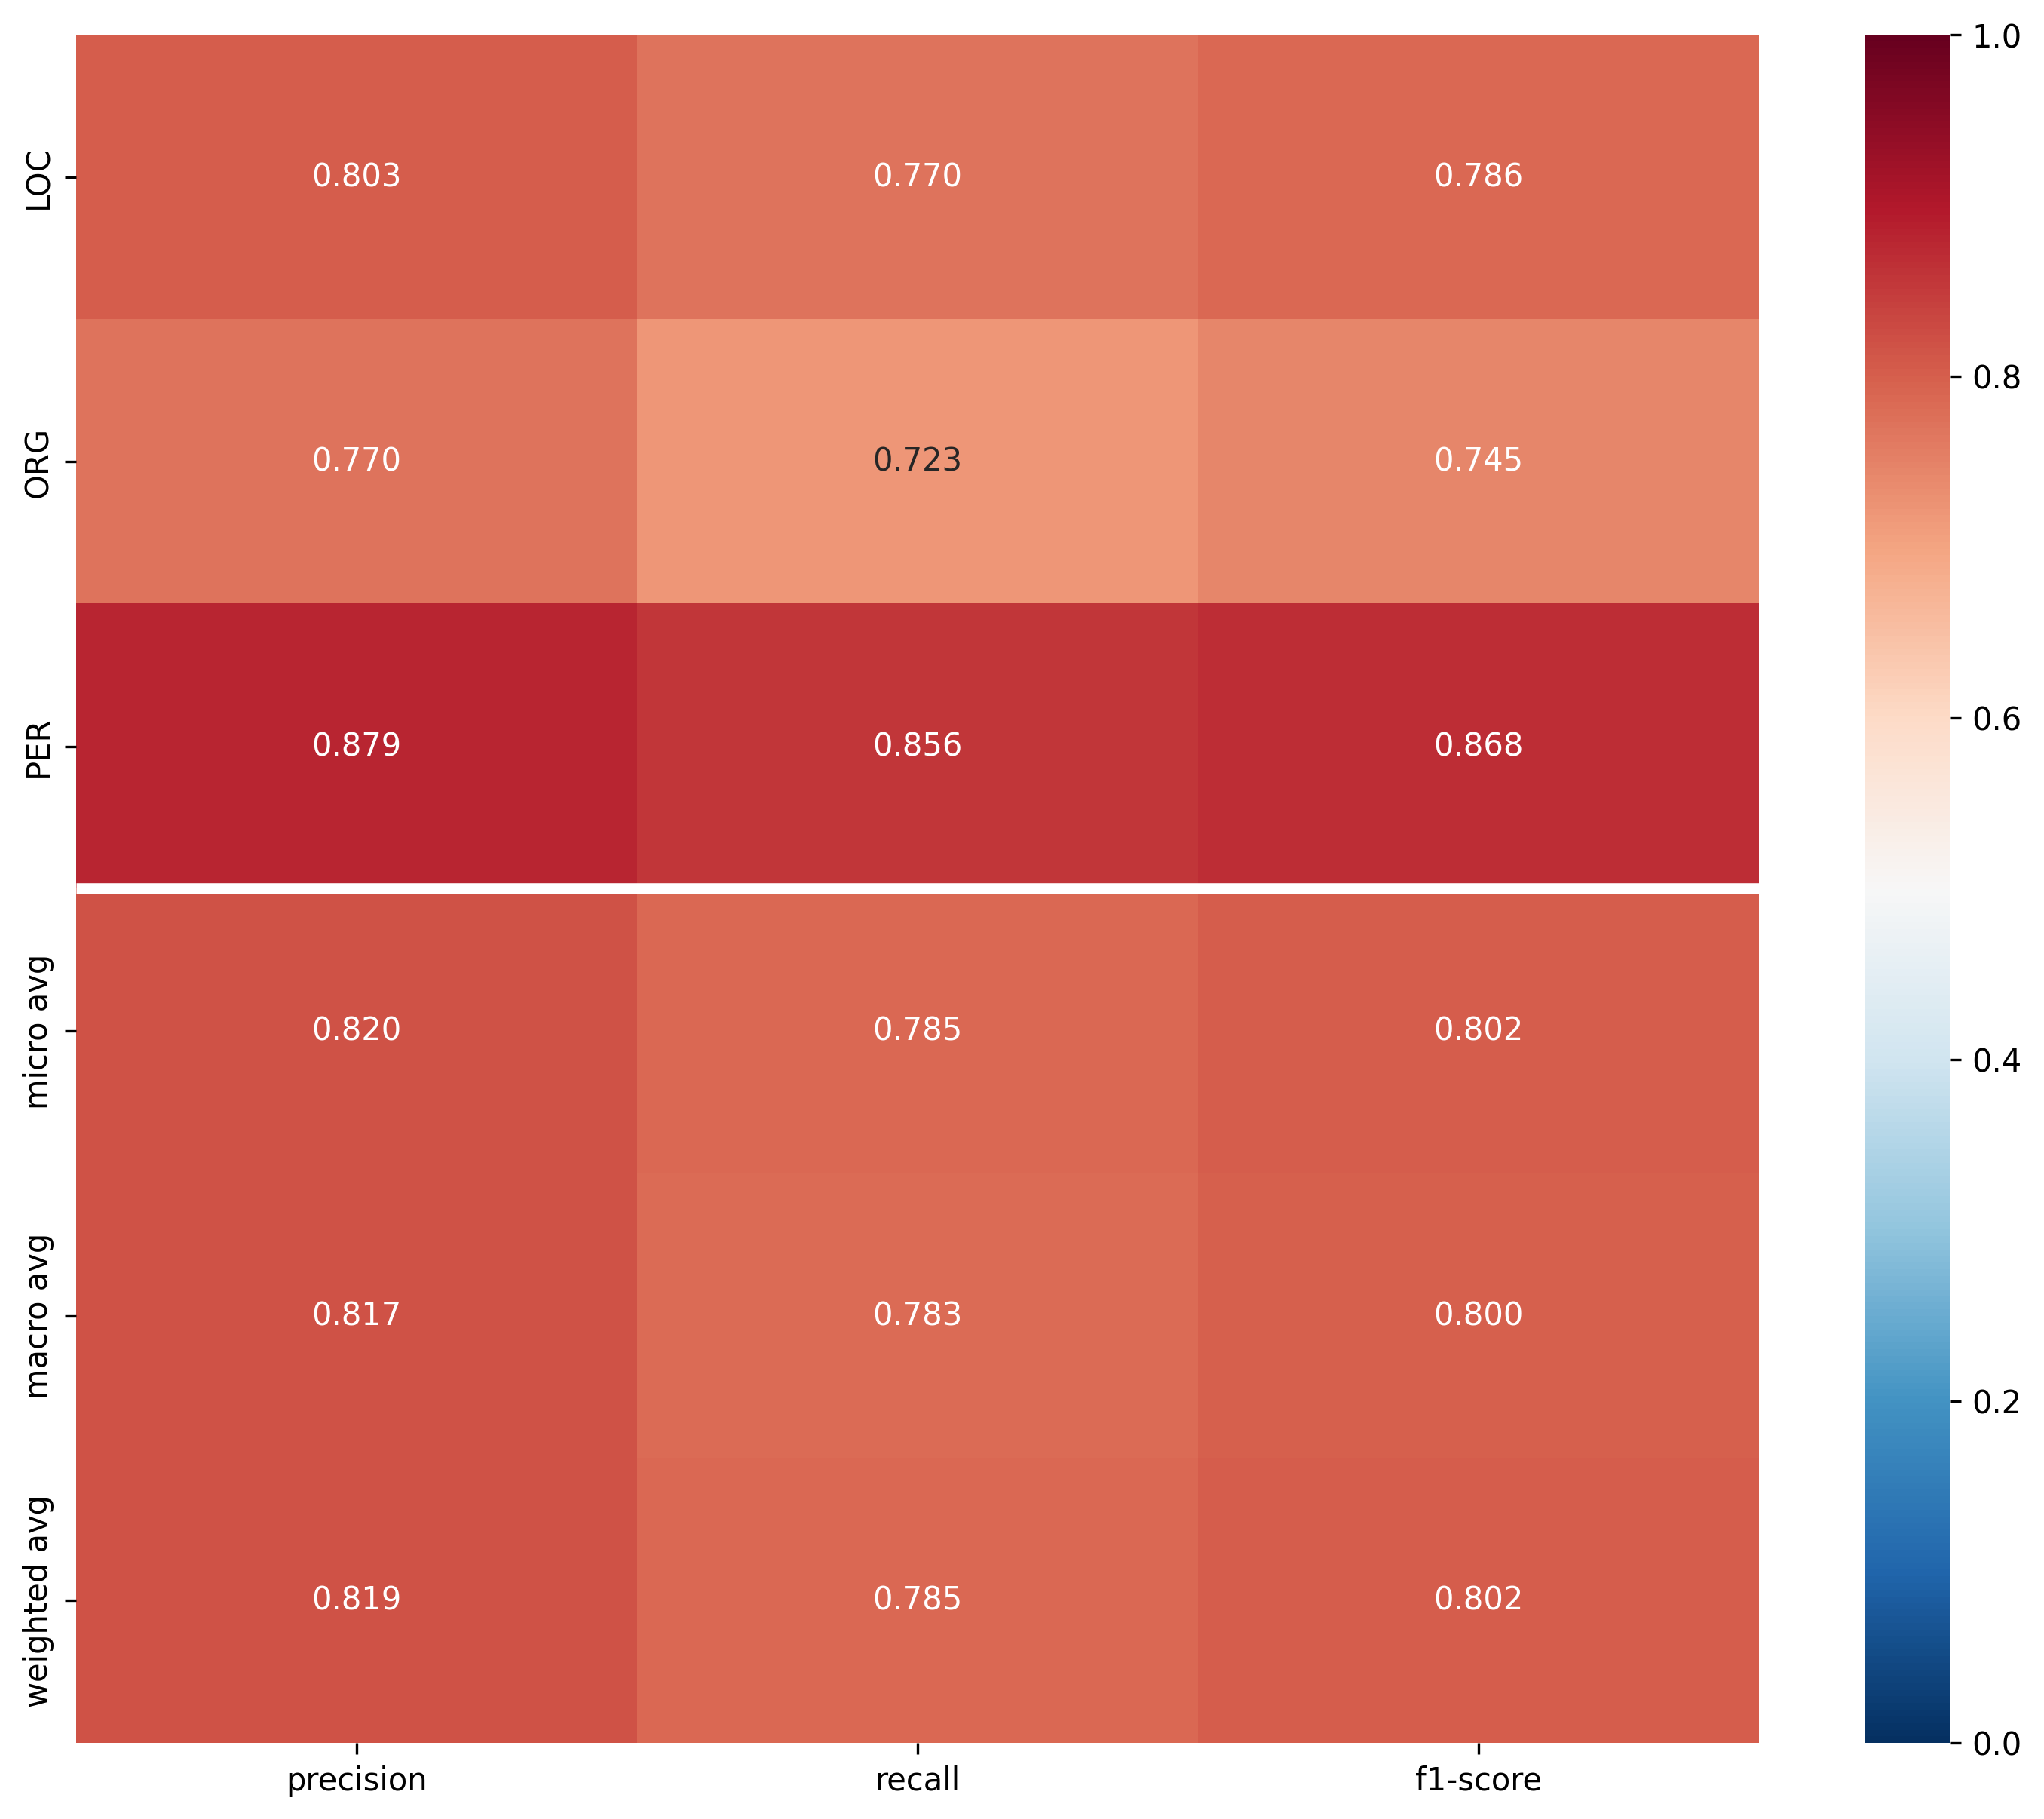

In [38]:
report = classification_report(y_test_fr, y_pred_fr, output_dict=True)
df_cr = pd.DataFrame(report)
fig, ax = plt.subplots(figsize=(12,10), dpi=300) 
sns.heatmap(df_cr.iloc[:-1, :].T, annot=True, fmt=".3f", cmap= 'RdBu_r', vmin=0, vmax=1, ax=ax )
ax.hlines([3], *ax.get_xlim(), colors="white", linewidths = 3.5)
fig.show()
fig.savefig(base_filename + "fr_cls_report.png")

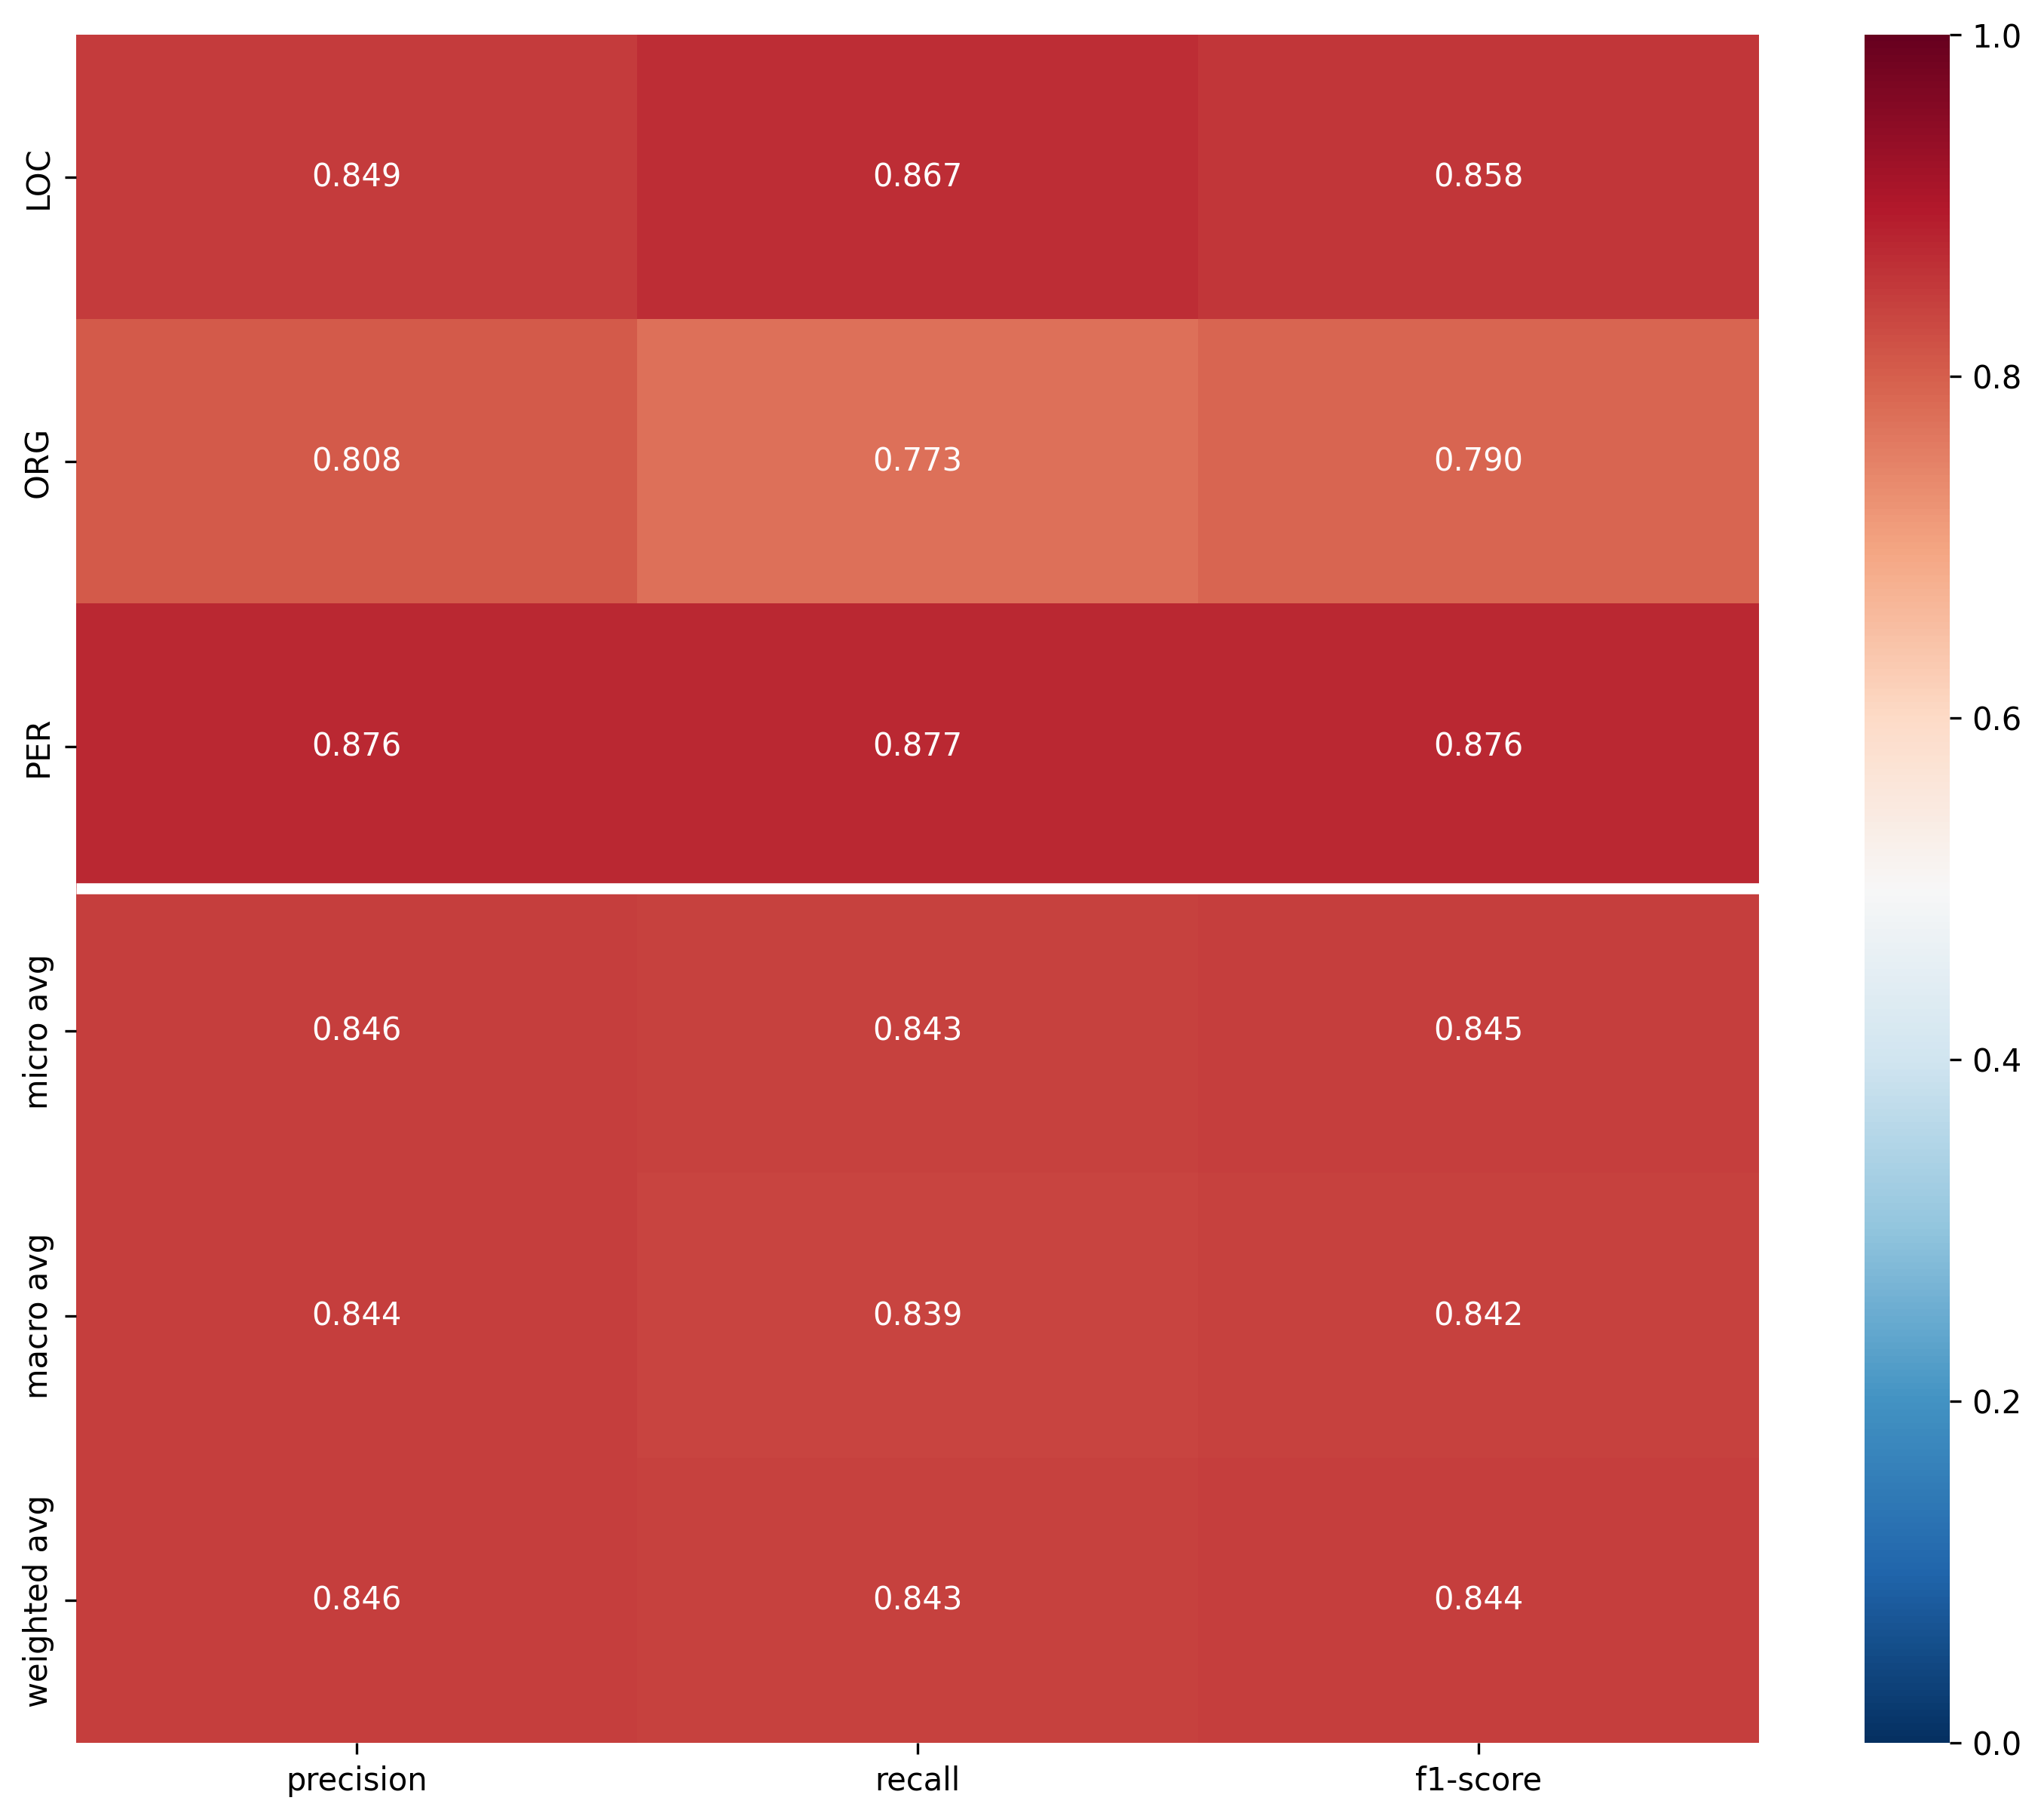

In [39]:
report = classification_report(y_test_es, y_pred_es, output_dict=True)
df_cr = pd.DataFrame(report)
fig, ax = plt.subplots(figsize=(12,10), dpi=300) 
sns.heatmap(df_cr.iloc[:-1, :].T, annot=True, fmt=".3f", cmap= 'RdBu_r', vmin=0, vmax=1, ax=ax )
ax.hlines([3], *ax.get_xlim(), colors="white", linewidths = 3.5)
fig.show()
fig.savefig(base_filename + "es_cls_report.png")

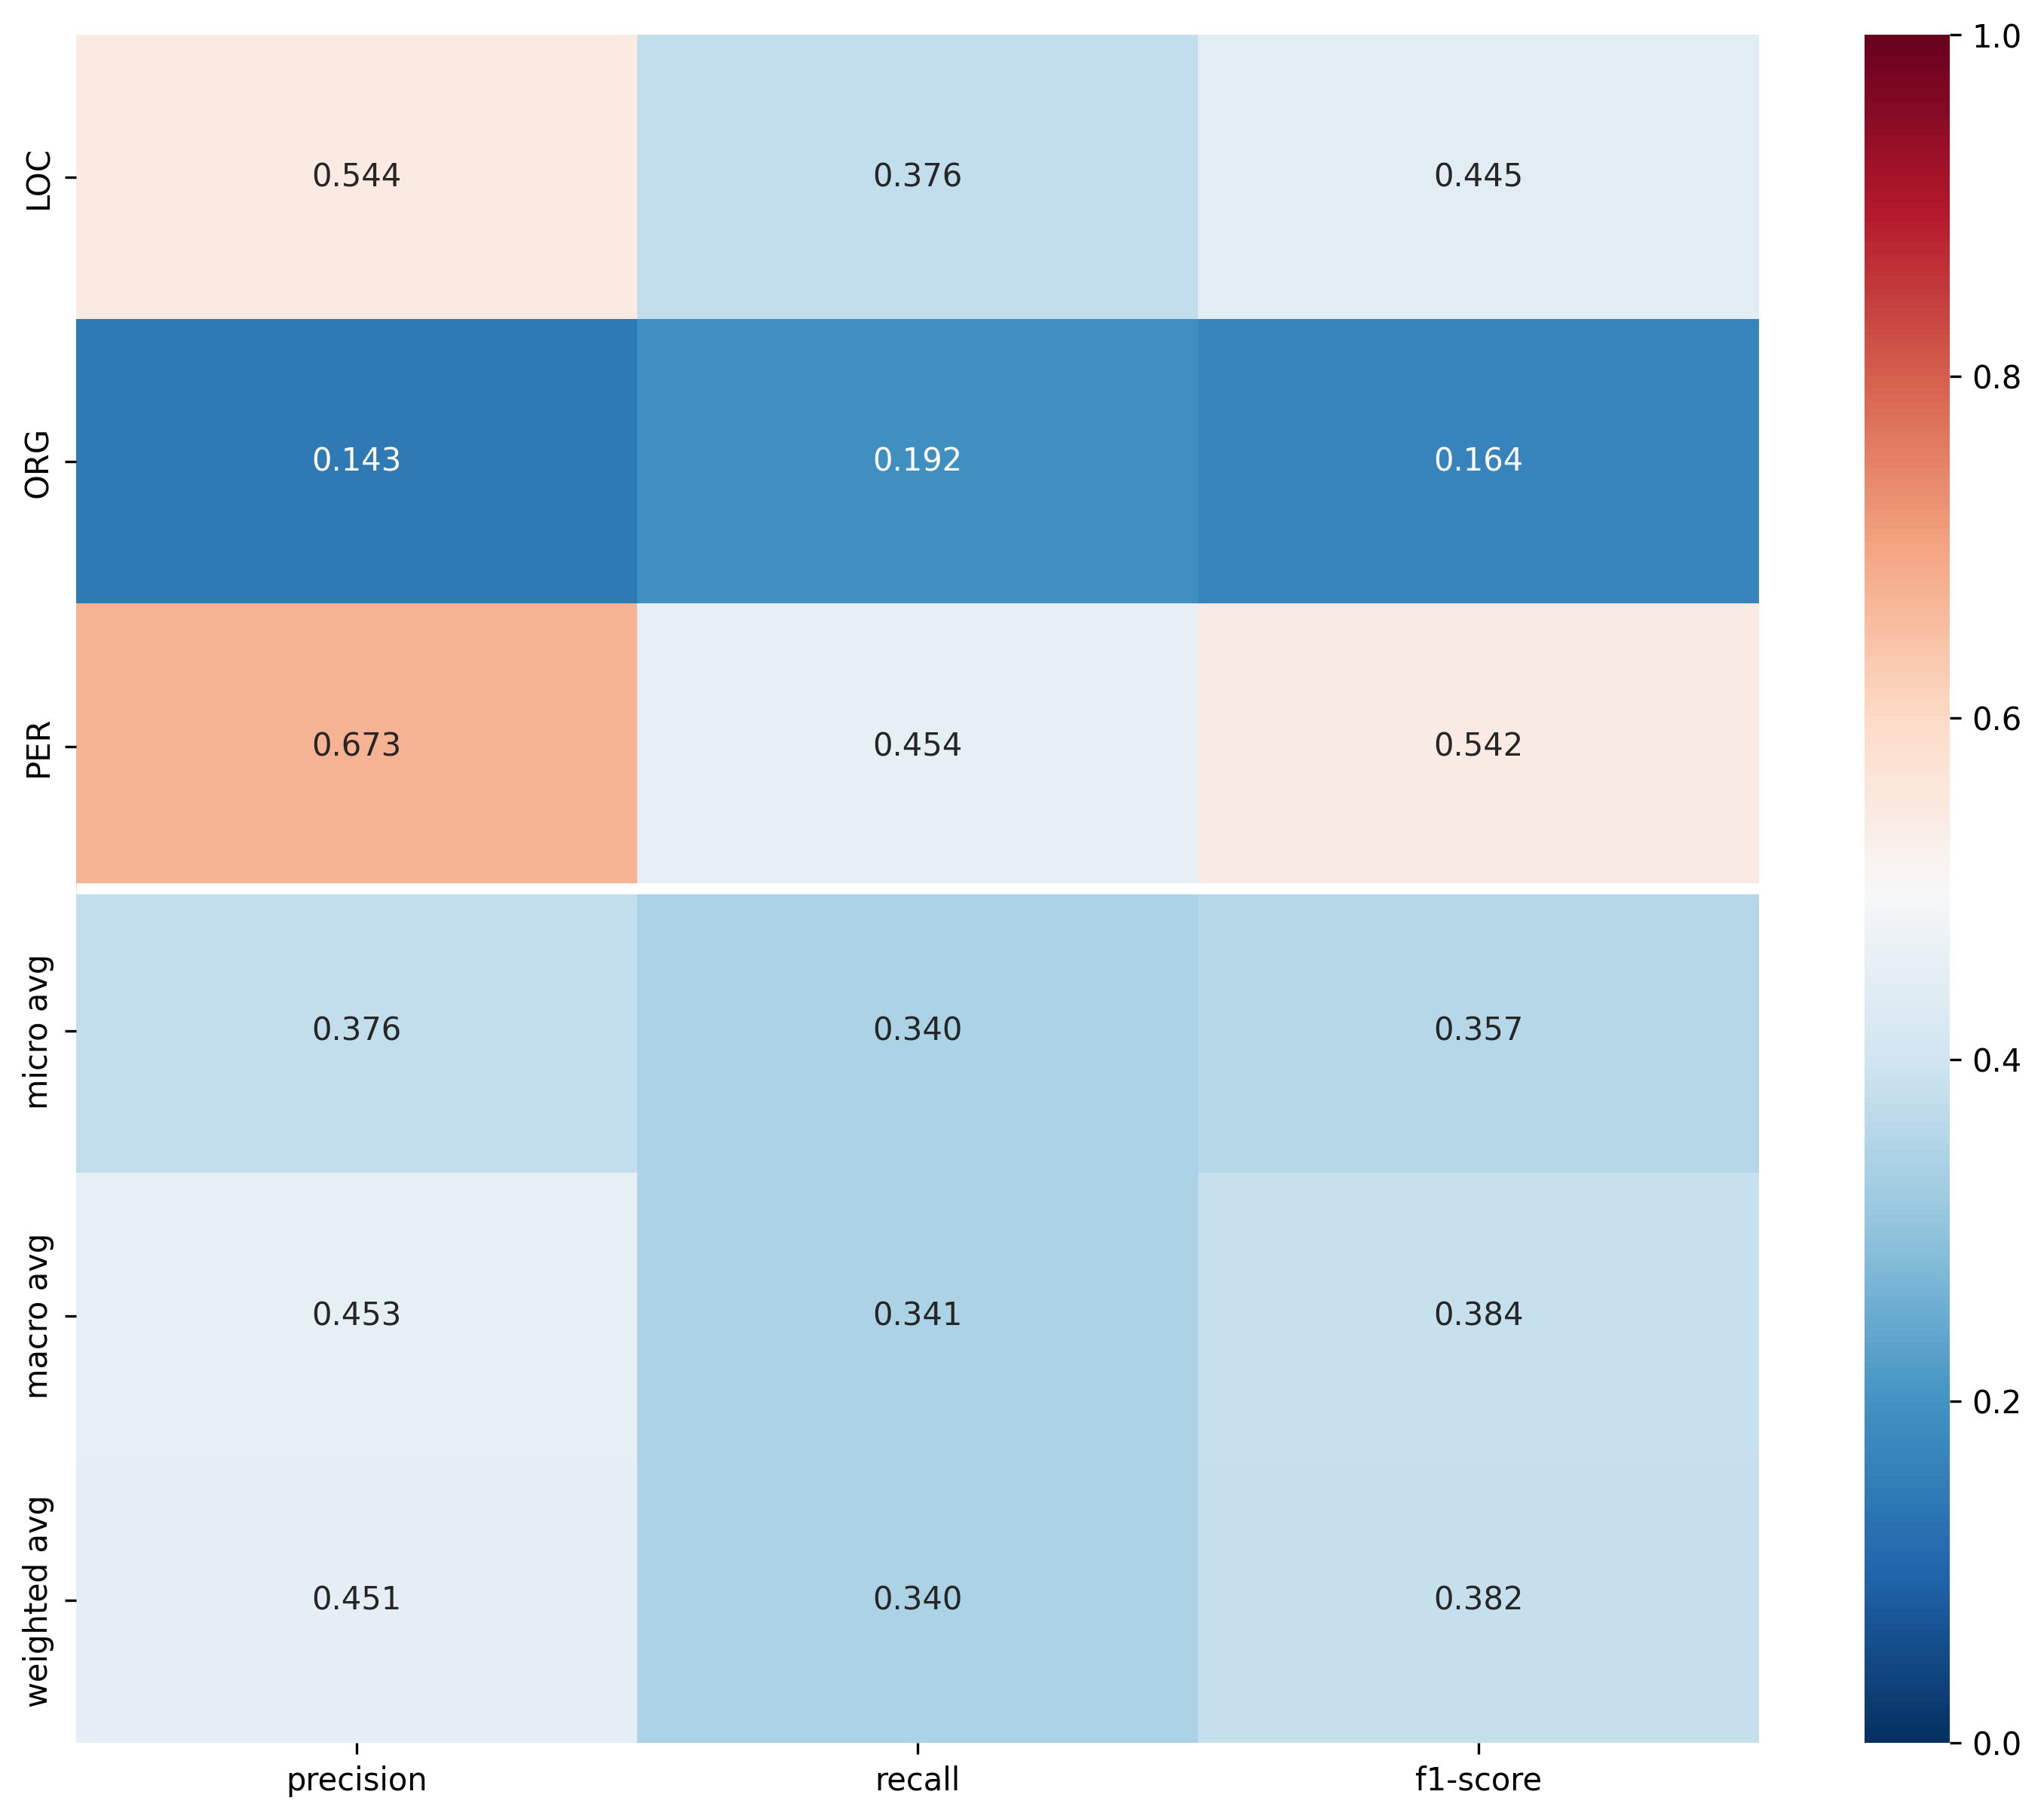

In [38]:
report = classification_report(y_test_conll, y_pred_conll, output_dict=True)
df_cr = pd.DataFrame(report)
fig, ax = plt.subplots(figsize=(12,10), dpi=300) 
sns.heatmap(df_cr.iloc[:-1, :].T, annot=True, fmt=".3f", cmap= 'RdBu_r', vmin=0, vmax=1, ax=ax )
ax.hlines([3], *ax.get_xlim(), colors="white", linewidths = 3.5)
fig.show()
fig.savefig(base_filename + "conll_cls_report.png")